In [1]:
#Creating the Washing Machine Controller Using the "skfuzzy control API"
#We can use the skfuzzy control system API to model this. First, we need to import the needed libraries:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#"scikit-fuzzy"(skfuzzy) is an fuzzy logic Python package that works with numpy arrays.

In [2]:
#Then, we need to define fuzzy variables:

tissue = ctrl.Antecedent(np.arange(0, 100, 1), 'tissue')
dirt = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt')
degree = ctrl.Antecedent(np.arange(0, 100, 1), 'degree')
time = ctrl.Consequent(np.arange(0, 100, 1), 'washing time')

In [13]:
time['Too Short'] = fuzz.trimf(time.universe, [0, 0, 25])
time['Short'] = fuzz.trimf(time.universe, [0, 25, 50])
time['Medium'] = fuzz.trimf(time.universe, [25, 50, 75])
time['Long'] = fuzz.trimf(time.universe, [50, 75, 100])
time['Too Long'] = fuzz.trimf(time.universe, [75, 100, 100])

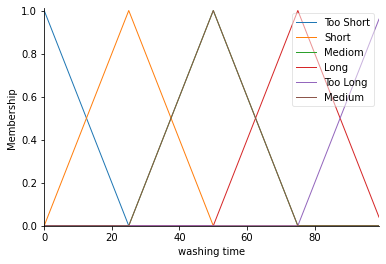

In [33]:
time.view()

In [4]:
tissue['silk'] = fuzz.trimf(tissue.universe, [0, 0, 50])
tissue['wool'] = fuzz.trimf(tissue.universe, [0, 50, 100])
tissue['cotton'] = fuzz.trimf(tissue.universe, [50, 100, 100])

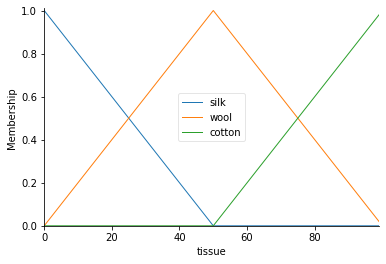

In [34]:
tissue.view()

In [6]:
degree['small'] = fuzz.trimf(degree.universe, [0, 0, 50])
degree['average'] = fuzz.trimf(degree.universe, [0, 50, 100])
degree['big'] = fuzz.trimf(degree.universe, [50, 100, 100])

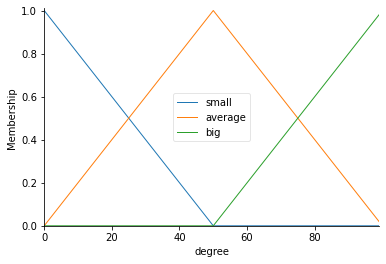

In [35]:
degree.view()

In [7]:
dirt['non-greasy'] = fuzz.trimf(dirt.universe, [0, 0, 50])
dirt['medium greasy'] = fuzz.trimf(dirt.universe, [0, 50, 100])
dirt['greasy'] = fuzz.trimf(dirt.universe, [50, 100, 100])

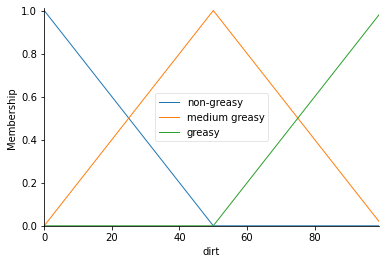

In [36]:
dirt.view()

In [ ]:
""""
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables.
Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, 
actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.
""""

In [24]:
rule1 = ctrl.Rule(tissue['silk'] & dirt['non-greasy'] & degree['small'],time['Too Short'] )
rule2 = ctrl.Rule(tissue['silk'] & dirt['non-greasy'] & degree['average'],time['Short'] )
rule3 = ctrl.Rule(tissue['silk'] & dirt['non-greasy'] & degree['big'],time['Medium'] )
rule4 = ctrl.Rule(tissue['silk'] & dirt['medium greasy'] & degree['small'],time['Medium'] )
rule5 = ctrl.Rule(tissue['silk'] & dirt['medium greasy'] & degree['average'],time['Long'] )
rule6 = ctrl.Rule(tissue['silk'] & dirt['medium greasy'] & degree['big'],time['Long'] )
rule7 = ctrl.Rule(tissue['silk'] & dirt['greasy'] & degree['small'],time['Medium'] )
rule8 = ctrl.Rule(tissue['silk'] & dirt['greasy'] & degree['average'],time['Long'] )
rule9 = ctrl.Rule(tissue['silk'] & dirt['greasy'] & degree['big'],time['Too Long'] )
rule10 = ctrl.Rule(tissue['wool'] & dirt['non-greasy'] & degree['small'],time['Short'] )
rule11 = ctrl.Rule(tissue['wool'] & dirt['non-greasy'] & degree['average'],time['Medium'] )
rule12 = ctrl.Rule(tissue['wool'] & dirt['non-greasy'] & degree['big'],time['Long'] )
rule13 = ctrl.Rule(tissue['wool'] & dirt['medium greasy'] & degree['small'],time['Medium'] )
rule14 = ctrl.Rule(tissue['wool'] & dirt['medium greasy'] & degree['average'],time['Medium'] )
rule15 = ctrl.Rule(tissue['wool'] & dirt['medium greasy'] & degree['big'],time['Long'] )
rule16 = ctrl.Rule(tissue['wool'] & dirt['greasy'] &degree['small'],time['Long'] )
rule17 = ctrl.Rule(tissue['wool'] & dirt['greasy'] & degree['average'],time['Long'])
rule18 = ctrl.Rule(tissue['wool'] & dirt['greasy'] & degree['big'],time['Too Long'] )
rule19 = ctrl.Rule(tissue['cotton'] & dirt['non-greasy'] & degree['small'],time['Short'] )
rule20 = ctrl.Rule(tissue['cotton'] & dirt['non-greasy'] & degree['average'],time['Medium'] )
rule21 = ctrl.Rule(tissue['cotton'] & dirt['non-greasy'] & degree['big'],time['Long'])
rule22 = ctrl.Rule(tissue['cotton'] & dirt['medium greasy'] & degree['small'],time['Medium'])
rule23 = ctrl.Rule(tissue['cotton'] & dirt['medium greasy'] & degree['average'],time['Long'])
rule24 = ctrl.Rule(tissue['cotton'] & dirt['medium greasy'] & degree['big'],time['Too Long'])
rule25 = ctrl.Rule(tissue['cotton'] & dirt['greasy'] &degree['small'],time['Long'])
rule26 = ctrl.Rule(tissue['cotton'] & dirt['greasy'] &degree['average'],time['Long'])
rule27 = ctrl.Rule(tissue['cotton'] & dirt['greasy'] & degree['big'],time['Too Long'])


In [37]:
#Now that we have our rules defined, we can simply create a control system via:

rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4,
                                   rule5, rule6, rule7, rule8,
                                   rule9, rule10, rule11, rule12,
                                   rule13, rule14, rule15, rule16,
                                   rule17, rule18, rule19, rule20,
                                   rule21, rule22, rule23, rule24,
                                   rule25, rule26, rule27])

In [38]:
#Despite the lengthy ruleset, the new fuzzy control system framework will execute in milliseconds. 
#Next we add these rules to a new ControlSystem and define a ControlSystemSimulation to run it.

f_logic = ctrl.ControlSystemSimulation(rules)

In [39]:
#We can now simulate our control system by simply specifying random inputs and calling the compute method. 

f_logic.input['tissue'] = 10
f_logic.input['dirt'] = 20
f_logic.input['degree'] = 30

f_logic.compute()

44.897161470451444


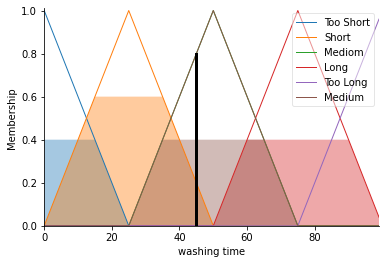

In [41]:
#Once computed, we can view the result as well as visualize it.

print (f_logic.output['washing time'])
time.view(sim=f_logic)

In [42]:
f_logic.input['tissue'] = 48
f_logic.input['dirt'] = 12
f_logic.input['degree'] = 98

71.10467240929262


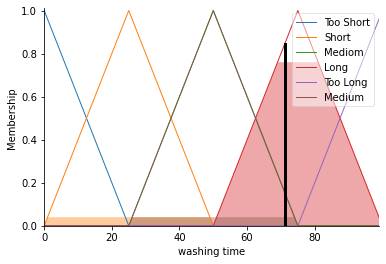

In [43]:
f_logic.compute()
print (f_logic.output['washing time'])
time.view(sim=f_logic)